In [51]:
#Mounting to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud

In [77]:
# Importing cleaned data 

df = pd.read_csv('/content/drive/MyDrive/codehouse/tweets_2021_cleaned.csv')

In [54]:
df.head(10)

,Unnamed: 0,tweets_text_processed
0,0,i am focusing more on the sessions about new s...
1,1,i was not aware there even was a backpack made...
2,2,recorded s shirt vmworld2020
3,3,wish you could be back at tune in feb at am e...
4,4,my backpack collection is now complete just no...
5,5,late gift from limited backpack is amazingthx
6,6,if you missed intels vivek sarathy at talking ...
7,7,recently headphones and earphones often hit we...
8,8,at analyzer proactively analyzes configs amp ...
9,9,finally its arrived thanks


In [55]:
print(df.shape)
print(df.isnull().values.any())
df.dropna(axis = 0 , inplace = True)
print(df.shape)

(3996, 2)
True
(3884, 2)


In [67]:
df.drop_duplicates(subset=['tweets_text_processed'],keep='first',inplace=True)
print(df.shape)
df.head(10)

(3236, 3)


,Unnamed: 0,tweets_text_processed,Num_words_text
0,0,focusing session new skill way thinking techni...,14
1,1,aware even backpack made backpack still favori...,12
2,2,recorded shirt,2
3,3,wish could back tune feb et highlight solution...,19
4,4,backpack collection complete received one add ...,17
5,5,late gift limited backpack amazingthx,5
6,6,missed intels vivek sarathy talking advantage ...,16
7,7,recently headphone earphone often hit well son...,12
8,8,analyzer proactively analyzes configs amp log ...,21
9,9,finally arrived thanks,3


In [68]:
df.head(10)

,Unnamed: 0,tweets_text_processed,Num_words_text
0,0,focusing session new skill way thinking techni...,14
1,1,aware even backpack made backpack still favori...,12
2,2,recorded shirt,2
3,3,wish could back tune feb et highlight solution...,19
4,4,backpack collection complete received one add ...,17
5,5,late gift limited backpack amazingthx,5
6,6,missed intels vivek sarathy talking advantage ...,16
7,7,recently headphone earphone often hit well son...,12
8,8,analyzer proactively analyzes configs amp log ...,21
9,9,finally arrived thanks,3


**WORD CLOUD**

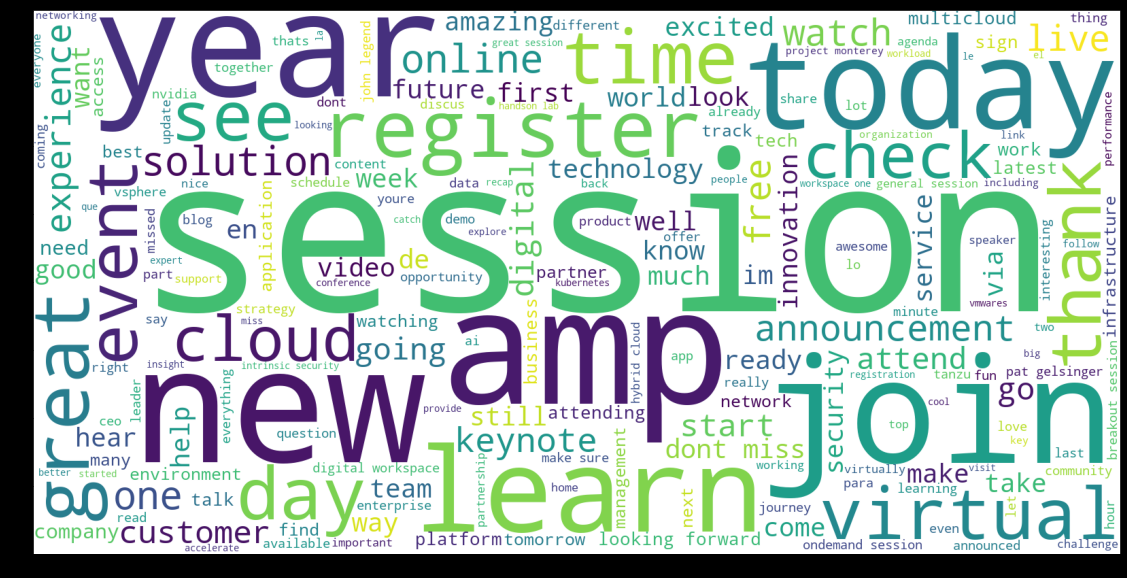

In [69]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df['tweets_text_processed'].tolist()))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [70]:
print(df['tweets_text_processed'])

0       focusing session new skill way thinking techni...
1       aware even backpack made backpack still favori...
2                                          recorded shirt
3       wish could back tune feb et highlight solution...
4       backpack collection complete received one add ...
                              ...                        
3991            th book new goal next year become present
3992    day awesome thanks nutanix best party week joe...
3993    blast cofounder amp cto bernard sander sure wh...
3994    please make vega sf moscone disappointing comp...
3995    welcome friend thats anytime might well start ...
Name: tweets_text_processed, Length: 3236, dtype: object


**Analysing the technologies presented during VMworld**

In [71]:
import string

d = {}
with open("/content/vmware keywords.txt") as f:
    for line in f:
       l = line.split(",")

for word in l:
    word = word.lower()
    word = word.split(" ")
    for w in word:
      if w not in d:
        d[w] = 0


**Analysing the most widely discussed technologies**

In [72]:
for text in df['tweets_text_processed']:
    text = text.split(" ")
    for word in text:
        if word in d:
            d[word] = d[word] + 1
  
for key in list(d.keys()):
    print(key, ":", d[key])

﻿advanced : 0
persistent : 1
threat : 5
 : 1
advanced : 12
protection : 14
allowlisting : 0
anywhere : 13
operations : 0
application : 75
management : 49
migration : 4
modernization : 41
monitoring : 8
refactoring : 0
release : 6
automation : 21
(ara) : 0
security : 106
virtualization : 21
bare : 5
metal : 5
hypervisor : 1
behavioral : 0
analysis : 6
big : 36
data : 67
analytics : 4
bring : 20
your : 0
own : 0
device : 20
(byod) : 0
business : 70
continuity : 4
plan : 22
mobility : 2
cloud : 290
architecture : 29
as : 0
a : 0
service : 74
computing : 11
infrastructure : 44
cost : 13
desktops : 0
economics : 0
elasticity : 0
networking : 33
(cloudops) : 0
orchestration : 0
roi : 0
scalability : 1
server : 17
storage : 24
tco : 5
components : 0
of : 0
kubernetes : 35
configuration : 3
container : 13
deployment : 13
containerization : 1
strategy : 34
containers : 0
converged : 2
cyber : 1
espionage : 0
hunting : 1
center : 29
extension : 0
firewall : 5
solutions : 0
denylisting : 0
deskto

In [73]:
res = {}
K = 50
for key in d:
    if not (isinstance(d[key], int) and d[key] < K):
        res[key] = d[key]

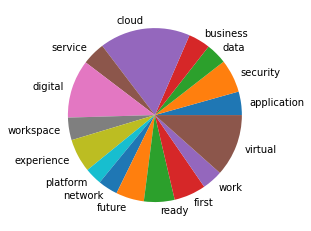

In [74]:
labels = list(res.keys())
values = list(res.values())

import matplotlib.pyplot as plt

plt.pie(values, labels=labels)
plt.show()

**TOP 8 discussed technologies during VMworld**

In [75]:
d1 = {
'cloud' : '291',
'security' : '101',
'big-data' : '39',
'networking' : '75',
'kubernetes' : '36',
'Saas' : '25',
'analytics' : '5',
'machine-learning' : '8'
}


**PIE CHART**

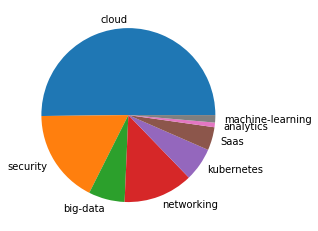

In [76]:
labels = list(d1.keys())
values = list(d1.values())

import matplotlib.pyplot as plt

plt.pie(values, labels=labels)
plt.show()